In [43]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
# Set up plotting style for better aesthetics
sns.set_theme(style="whitegrid", palette="viridis")

In [45]:
# Load the CSV file
df = pd.read_csv("versions.csv")
# Ensure Total_Projects is treated as a number
df['total_hits'] = pd.to_numeric(df['total_hits'], errors='coerce')
# Drop any rows where data could not be parsed (e.g., 'ERROR' rows)
df.dropna(subset=['total_hits'], inplace=True)    
# Extract the Major Version (e.g., '1.21' from '1.21.10')
df['major_vers'] = df['mc_vers'].apply(lambda x: '.'.join(x.split('.')[:2]))

print(f"Data loaded successfully from versions. Total entries: {len(df)}")

Data loaded successfully from versions. Total entries: 97


In [46]:
# Normalize the project counts to a 0-1 range for color mapping
min_hits = df['total_hits'].min()
max_hits = df['total_hits'].max()

In [47]:
# Use the 'viridis' colormap
cmap = plt.cm.get_cmap('viridis')

/var/folders/q_/1v_rmf2s45v19pn5b11rmg000000gp/T/ipykernel_37834/890025786.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


In [48]:
# Calculate colors for each bar based on its Total_Projects value
df['color_val'] = (df['total_hits'] - min_hits) / (max_hits - min_hits)
df['bar_color'] = df['color_val'].apply(lambda x: cmap(x))

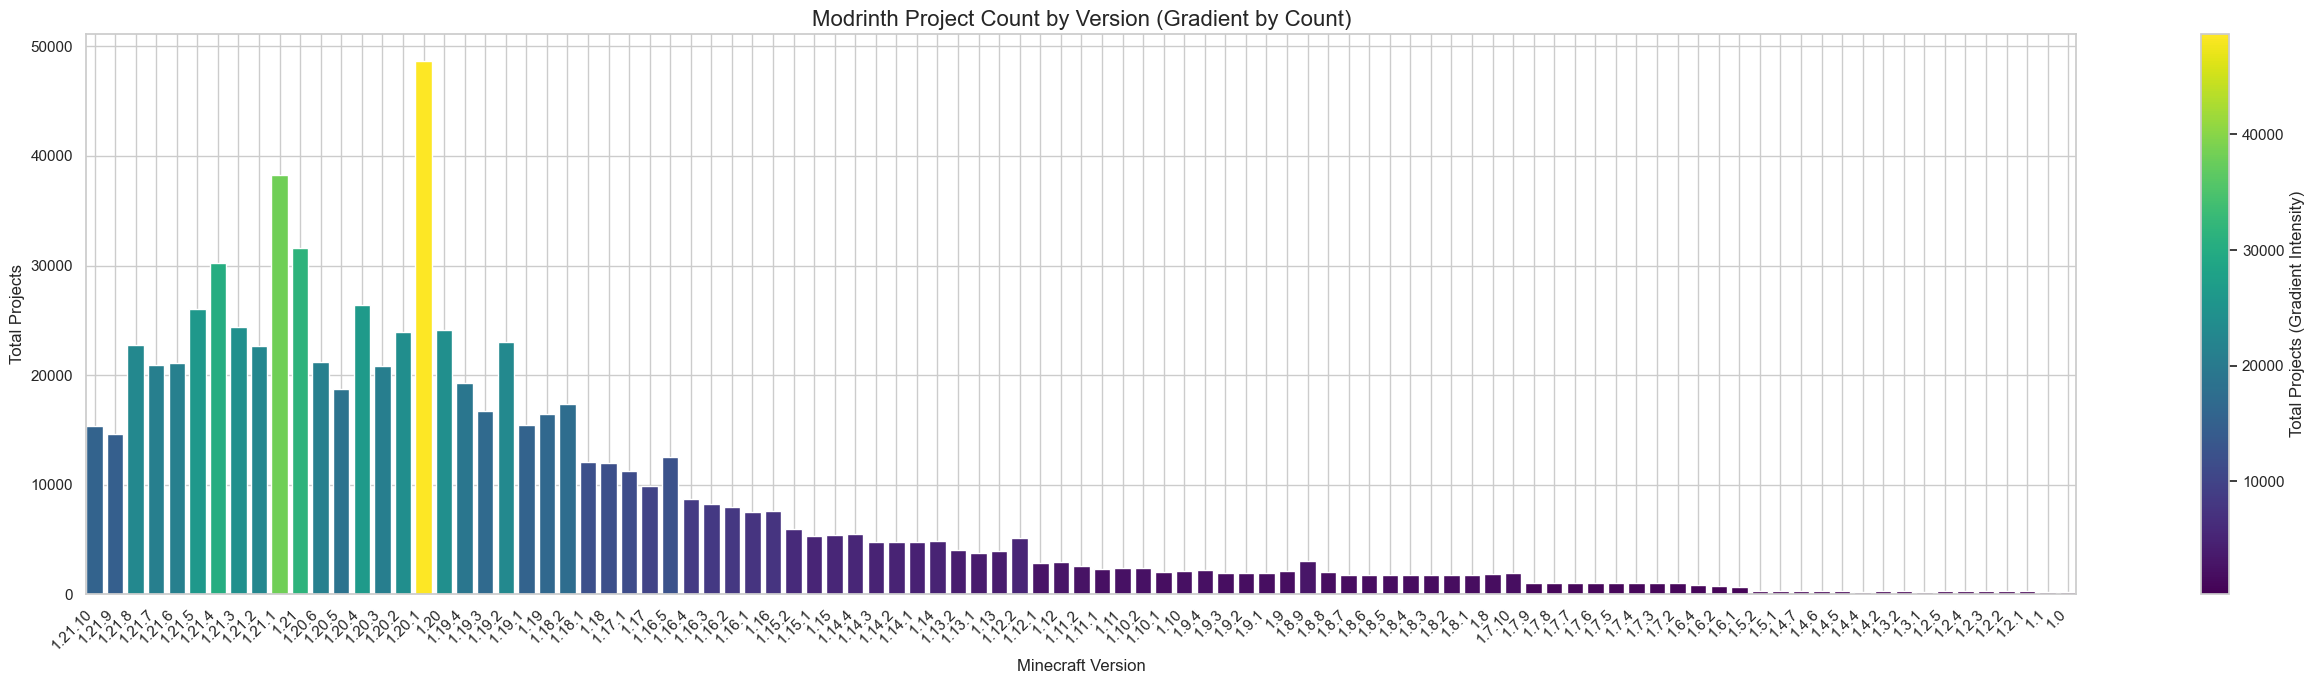

In [58]:
# --- 3. Plot 1: Bar Graph for Individual Versions ---
plt.figure(figsize=(26, 7))
# Create the bar plot using the calculated colors
bars = plt.bar(
    df['mc_vers'], 
    df['total_hits'], 
    color=df['bar_color']
)
plt.margins(x=0)
# Add gradient legend/colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_hits, vmax=max_hits))
sm.set_array([]) # Required for older matplotlib versions
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Total Projects (Gradient Intensity)')
plt.title('Modrinth Project Count by Version (Gradient by Count)', fontsize=16)
plt.xlabel('Minecraft Version', fontsize=12)
plt.ylabel('Total Projects', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
fig = plt.gcf()
fig.savefig("mod_vers.png", dpi=300, bbox_inches="tight")
plt.show()